In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.externals import joblib 

In [3]:
lda = joblib.load('../data/lda_pickle_736.pkl')

In [ ]:
import sys
sys.path.insert(0, '../corpora')
from corpus import Corpus

In [4]:
import gensim

In [5]:
dic = gensim.corpora.Dictionary.load('../data/corpus_dic.dat')

In [6]:
from glob2 import glob

In [17]:
from scipy.sparse import csr_matrix

In [7]:
basedir = '../../enron_mail_clean/'
docs = glob(basedir + '/**/*.')


In [10]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')

In [63]:
def docVector(doc, dic):
    with open(doc, 'r') as fin:
        mail = fin.readlines()
        mail = ''.join(mail)
        tokens = tokenizer.tokenize(mail)
        tokens = [ t.lower() for t in tokens ]

        wcTuples = dic.doc2bow(tokens)
        data = []
        row  = []
        col  = []

        for w,c in wcTuples:
            col.append(0)
            row.append(w)
            data.append(c)

        nSamples = 1
        nFeatures = len(dic)
        oneDoc = csr_matrix((data, (col,row)), shape=(nSamples, nFeatures))
        docWeights = lda.transform(oneDoc)[0]
        print len(tokens)
        #docWeights /= docWeights.sum()
        return docWeights



In [32]:
from scipy.spatial.distance import pdist,squareform

In [64]:
docTopics = np.array([ docVector(doc, dic) for doc in docs[:500] ])

369
195
59
4
95
690
59
150
157
70
119
26
84
64
10
3
34
36
58
19
2
289
162
252
2158
68
2
92
128
257
83
153
4
428
6
647
261
16
98
222
198
12
298
20
441
685
25
118
142
37
368
146
775
1375
96
461
438
15
193
52
160
2
77
50
131
621
246
4
186
67
108
97
477
66
456
66
57
25
18
410
67
786
114
130
389
244
82
127
136
88
30
149
124
385
67
2
416
20
105
85
225
124
1
403
132
159
620
135
139
214
497
25
54
699
81
202
1131
39
216
40
1
55
661
59
99
153
279
8
438
168
115
17
258
4
5
1235
0
141
19
328
38
110
808
380
124
48
249
2122
647
3
197
5
4
1551
111
124
150
184
9
395
11
126
29
127
142
136
491
2
184
137
87
124
135
288
44
135
646
24
25
2
96
80
171
136
63
259
2
479
83
156
1146
1093
423
184
135
130
169
1464
166
62
498
2
32
201
52
820
208
2
103
136
134
274
392
385
862
185
2
162
463
153
196
130
162
135
11
1388
129
5
78
16
25
245
33
82
239
2
352
381
87
102
505
55
602
1903
237
326
607
106
92
80
161
782
2
1445
189
309
1
13
16
124
252
29
16
139
1660
92
103
13
135
40
456
101
124
295
562
227
368
1375
62
209
386
900

In [66]:
docTopics.sum(axis=1)

array([  1.84000000e+02,   9.60000000e+01,   3.70000000e+01,
         1.00000000e+00,   4.50000000e+01,   2.34000000e+02,
         4.00000000e+01,   7.80000000e+01,   7.20000000e+01,
         3.70000000e+01,   5.40000000e+01,   1.50000000e+01,
         3.90000000e+01,   2.50000000e+01,   6.00000000e+00,
         1.00000000e+00,   1.50000000e+01,   1.90000000e+01,
         2.70000000e+01,   6.00000000e+00,   1.00000000e+00,
         1.33000000e+02,   8.10000000e+01,   9.50000000e+01,
         1.05900000e+03,   2.80000000e+01,   3.00000000e+00,
         2.70000000e+01,   7.30000000e+01,   1.15000000e+02,
         3.70000000e+01,   8.30000000e+01,   2.00000000e+00,
         2.18000000e+02,   3.00000000e+00,   2.23000000e+02,
         1.20000000e+02,   1.00000000e+01,   5.30000000e+01,
         1.18000000e+02,   3.49999999e+01,   5.00000000e+00,
         1.19000000e+02,   1.10000000e+01,   1.73000000e+02,
         3.01000000e+02,   1.70000000e+01,   4.90000000e+01,
         8.20000000e+01,

In [49]:
docTopics[docTopics < 0.2] = 0
docTopics

array([[ 0.34705483,  0.22756193,  0.        , ...,  0.29115519,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.40504574,  0.        , ...,  0.        ,
         0.        ,  0.20902303],
       ..., 
       [ 0.        ,  0.21878985,  0.        , ...,  0.        ,
         0.20627538,  0.35743528],
       [ 0.46758474,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.27178024],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [79]:
distDocs = pdist(docTopics, 'cosine')

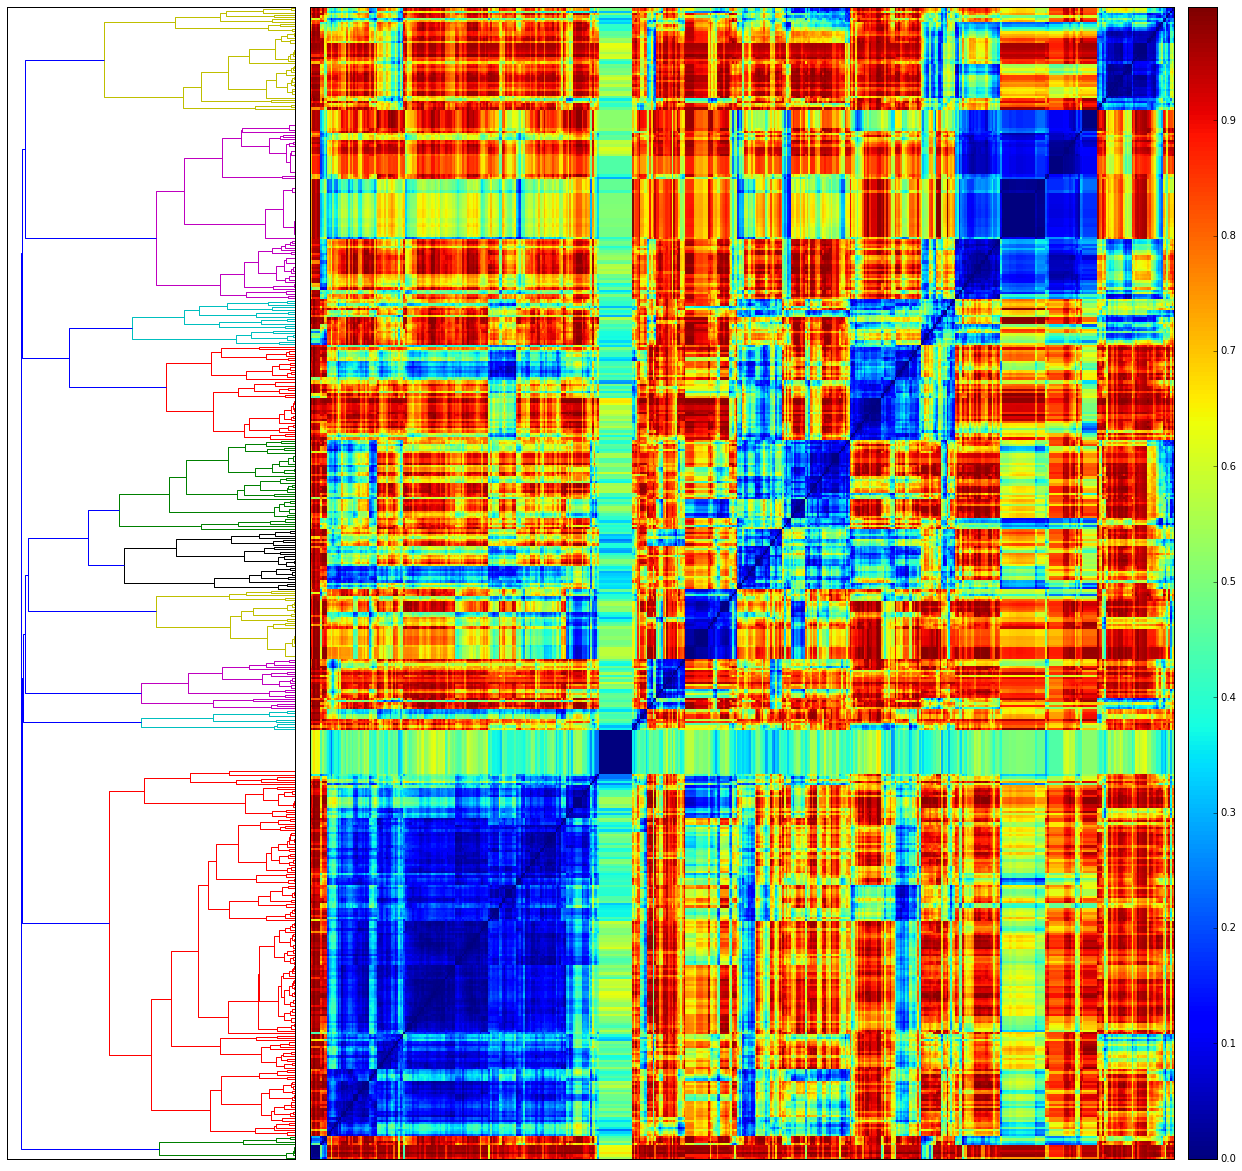

In [90]:
import pylab
# Compute and plot dendrogram.
fig = pylab.figure(figsize=(20,20))
axdendro = fig.add_axes([0.09,0.1,0.2,0.8])
Y = sch.linkage(distDocs, method='complete')
Z = sch.dendrogram(Y, orientation='right')
axdendro.set_xticks([])
axdendro.set_yticks([])

# Plot distance matrix.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.8])
index = Z['leaves']
D = squareform(distDocs)
D = D[index,:]
D = D[:,index]
im = axmatrix.matshow(D, aspect='auto', origin='lower')
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.8])
pylab.colorbar(im, cax=axcolor)

# Display and save figure.
fig.show()

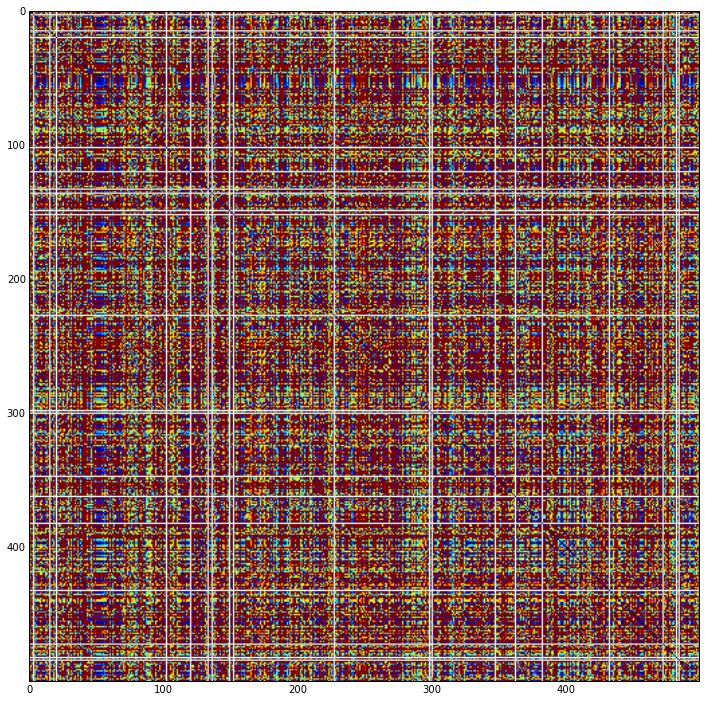

In [70]:
figure(figsize=(12,12))
imshow(squareform(distDocs))
#colormaps('gray')